<a href="https://colab.research.google.com/github/hye-ya-i/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기

print(df)

## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력

## data.json 파일 DataFrame 읽기

print(df)

## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성

## 주민등록번호 마스킹


## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기


print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송

    ## JSON 데이터 읽기

    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속


## 사이트 접속 대기


## 페이지 제목 출력


## 드라이버 종료
driver.quit()


# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests
import json

## 데이터 수집 url 및 api key 설정
api_key = '765965645a776c67313134774d587251'
url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/2015/01'

## 데이터 요청
response = requests.get(url)

## 호출 성공/실패 출력
if response.status_code == 200:
    data = response.json()
    print(json.dumps(data, indent=2, ensure_ascii=False))
else:
    print(f"API 호출 실패: {response.status_code}")


{
  "energyUseDataSummaryInfo": {
    "list_total_count": 7,
    "RESULT": {
      "CODE": "INFO-000",
      "MESSAGE": "정상 처리되었습니다"
    },
    "row": [
      {
        "YEAR": "2015",
        "MON": "01",
        "MM_TYPE": "개인",
        "CNT": "767791",
        "EUS": "193784708",
        "EUS1": "194781915",
        "EUS2": "204969429",
        "ECO2_1": "-6090964",
        "ECO2_2": "-2582568.736",
        "GUS": "59133720",
        "GUS1": "57163993",
        "GUS2": "68297619",
        "GCO2_1": "-3597086",
        "GCO2_2": "-8057472.64",
        "WUS": "12819757.886",
        "WUS1": "12723680.426",
        "WUS2": "12899476.73",
        "WCO2_1": "8179.308",
        "WCO2_2": "2715.530256",
        "HUS": "22740838.937",
        "HUS1": "23400055.303",
        "HUS2": "27090493.875",
        "HCO2_1": "-2504435.652",
        "HCO2_2": "-33660084.213069",
        "REG_DATE": "2015-06-04 17:03:55.0"
      },
      {
        "YEAR": "2015",
        "MON": "01",
        "MM_TYPE":

In [ ]:
import requests
import json

# -----------------------------
api_key = '765965645a776c67313134774d587251'  # 여기에 발급받은 API 키 입력
BASE_URL = "http://openapi.seoul.go.kr:8088"
SERVICE = "energyUseDataSummaryInfo"
# -----------------------------

# 연/월 리스트 생성
def get_year_months():
    year_months = []
    for year in range(2015, 2025):
        for month in range(1, 13):
            year_months.append((year, month))
    return year_months

responses = []

for year, month in get_year_months():
    url = f"{BASE_URL}/{api_key}/json/{SERVICE}/1/1000/{year}/{month:02d}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        responses.append(data)  # 월별 데이터를 리스트에 추가
        print(f"{year}-{month:02d} 데이터 수집 완료")
    else:
        print(f"{year}-{month:02d} API 호출 실패: {response.status_code}")

# 확인용 출력 (예: 첫 달 데이터)
if responses:
    print(json.dumps(responses[0], indent=2, ensure_ascii=False))


2015-01 데이터 수집 완료
2015-02 데이터 수집 완료
2015-03 데이터 수집 완료
2015-04 데이터 수집 완료
2015-05 데이터 수집 완료
2015-06 데이터 수집 완료
2015-07 데이터 수집 완료
2015-08 데이터 수집 완료
2015-09 데이터 수집 완료
2015-10 데이터 수집 완료
2015-11 데이터 수집 완료
2015-12 데이터 수집 완료
2016-01 데이터 수집 완료
2016-02 데이터 수집 완료
2016-03 데이터 수집 완료
2016-04 데이터 수집 완료
2016-05 데이터 수집 완료
2016-06 데이터 수집 완료
2016-07 데이터 수집 완료
2016-08 데이터 수집 완료
2016-09 데이터 수집 완료
2016-10 데이터 수집 완료
2016-11 데이터 수집 완료
2016-12 데이터 수집 완료
2017-01 데이터 수집 완료
2017-02 데이터 수집 완료
2017-03 데이터 수집 완료
2017-04 데이터 수집 완료
2017-05 데이터 수집 완료
2017-06 데이터 수집 완료
2017-07 데이터 수집 완료
2017-08 데이터 수집 완료
2017-09 데이터 수집 완료
2017-10 데이터 수집 완료
2017-11 데이터 수집 완료
2017-12 데이터 수집 완료
2018-01 데이터 수집 완료
2018-02 데이터 수집 완료
2018-03 데이터 수집 완료
2018-04 데이터 수집 완료
2018-05 데이터 수집 완료
2018-06 데이터 수집 완료
2018-07 데이터 수집 완료
2018-08 데이터 수집 완료
2018-09 데이터 수집 완료
2018-10 데이터 수집 완료
2018-11 데이터 수집 완료
2018-12 데이터 수집 완료
2019-01 데이터 수집 완료
2019-02 데이터 수집 완료
2019-03 데이터 수집 완료
2019-04 데이터 수집 완료
2019-05 데이터 수집 완료
2019-06 데이터 수집 완료
2019-07 데이터 수집 완료
2019-08 데이

In [ ]:
import requests
import pandas as pd

# 🔹 서울 열린데이터 API 기본 설정
API_KEY = "765965645a776c67313134774d587251"   # 발급받은 개인 인증키
BASE_URL = "http://openapi.seoul.go.kr:8088"  # 기본 API URL
SERVICE = "energyUseDataSummaryInfo"          # 사용할 서비스명

# 🔹 연월(YYYYMM) 목록 생성 함수
def get_year_months():
    year_months = []
    # 2015년부터 2024년까지 반복
    for year in range(2015, 2024 + 1):
        # 1월부터 12월까지 반복
        for month in range(1, 12 + 1):
            # 예: 201501, 201502, ..., 202412 형태로 저장
            year_months.append(f'{year}{month:02d}')
    return year_months

# 🔹 전체 결과를 담을 리스트
responses = []

# 🔹 각 연월별로 API 호출
for year_month in get_year_months():
    year = year_month[:4]      # 앞 4자리 → 연도
    month = year_month[4:]     # 뒤 2자리 → 월

    # API URL 구성 (1~1000건 요청)
    url = f"{BASE_URL}/{API_KEY}/json/{SERVICE}/1/1000/{year}/{month}"

    # API 요청
    response = requests.get(url)

    if response.status_code == 200:
        # JSON 데이터 중 실제 row 부분만 추출
        data = response.json().get(SERVICE, {}).get("row", [])

        # "개인" 유형만 필터링
        personal_data = [row for row in data if "개인" in str(row)]

        # year, month 컬럼 추가
        for row in personal_data:
            row["year"] = int(year)
            row["month"] = int(month)

        # 결과 리스트에 누적
        responses.extend(personal_data)

        # 실행 결과 출력 (API 호출 성공 확인용)
        print(f"{year}-{month} ✅ API 호출 성공 / 수집: {len(personal_data)}건")
    else:
        # 실패 시 상태 코드 출력
        print(f"{year}-{month} ❌ API 호출 실패 (status: {response.status_code})")

# 🔹 CSV 파일로 저장
if responses:
    df = pd.DataFrame(responses)
    df.to_csv("personal_energy_use.csv", index=False, encoding="utf-8-sig")
    print("✅ CSV 저장 완료 → personal_energy_use.csv")
else:
    print("❌ 수집된 데이터가 없습니다.")


2015-01 ✅ API 호출 성공, 수집 데이터 7건
2015-02 ✅ API 호출 성공, 수집 데이터 7건
2015-03 ✅ API 호출 성공, 수집 데이터 7건
2015-04 ✅ API 호출 성공, 수집 데이터 7건
2015-05 ✅ API 호출 성공, 수집 데이터 7건
2015-06 ✅ API 호출 성공, 수집 데이터 7건
2015-07 ✅ API 호출 성공, 수집 데이터 7건
2015-08 ✅ API 호출 성공, 수집 데이터 7건
2015-09 ✅ API 호출 성공, 수집 데이터 7건
2015-10 ✅ API 호출 성공, 수집 데이터 7건
2015-11 ✅ API 호출 성공, 수집 데이터 7건
2015-12 ✅ API 호출 성공, 수집 데이터 7건
2016-01 ✅ API 호출 성공, 수집 데이터 7건
2016-02 ✅ API 호출 성공, 수집 데이터 7건
2016-03 ✅ API 호출 성공, 수집 데이터 7건
2016-04 ✅ API 호출 성공, 수집 데이터 7건
2016-05 ✅ API 호출 성공, 수집 데이터 7건
2016-06 ✅ API 호출 성공, 수집 데이터 7건
2016-07 ✅ API 호출 성공, 수집 데이터 7건
2016-08 ✅ API 호출 성공, 수집 데이터 7건
2016-09 ✅ API 호출 성공, 수집 데이터 7건
2016-10 ✅ API 호출 성공, 수집 데이터 7건
2016-11 ✅ API 호출 성공, 수집 데이터 7건
2016-12 ✅ API 호출 성공, 수집 데이터 7건
2017-01 ✅ API 호출 성공, 수집 데이터 7건
2017-02 ✅ API 호출 성공, 수집 데이터 7건
2017-03 ✅ API 호출 성공, 수집 데이터 7건
2017-04 ✅ API 호출 성공, 수집 데이터 7건
2017-05 ✅ API 호출 성공, 수집 데이터 7건
2017-06 ✅ API 호출 성공, 수집 데이터 7건
2017-07 ✅ API 호출 성공, 수집 데이터 7건
2017-08 ✅ API 호출 성공, 수집 데이터 7건
2017-09 

In [5]:
######################## 1-2

import requests
import pandas as pd

## 서울 열린데이터 API 기본 설정
API_KEY = "765965645a776c67313134774d587251"
BASE_URL = "http://openapi.seoul.go.kr:8088"
SERVICE = "energyUseDataSummaryInfo" # 사용된 서비스명

## 힌트 참조하여 2015/1-2024/12 데이터 수집
def get_year_months():
    year_months = []
    for year in range(2015, 2024 + 1):
        for month in range(1, 12 + 1):
            year_months.append(f'{year}{month:02d}')
    return year_months

responses = []

## 각 연월별로 API 호출하여 responses에 데이터 담기
for year_month in get_year_months():
    year = year_month[:4]      # 앞 4자리라는 의미
    month = year_month[4:]     # 뒤 2자리라는 의미(4번째부터 끝까지)

    ## 기존 end_index가 5였던 부분을 큰 숫자로 바꾸어서 많은 데이터 가져오기
    url = f"{BASE_URL}/{API_KEY}/json/{SERVICE}/1/1000/{year}/{month}"

    response = requests.get(url)

    if response.status_code == 200:
        ## row 부분만 가져오기
        data = response.json().get(SERVICE, {}).get("row", [])

        ## 개인 유형만 가져오기
        personal_data = [row for row in data if "개인" in str(row)]

        ## 연도별로 각각 만들어서 모두 담기
        for row in personal_data:
            row["year"] = int(year)
            row["month"] = int(month)

        ## 결과 누적하여 담기
        responses.extend(personal_data)

        ## api 호출 성공했을 때
        print(f"{year}-{month} api 호출 성공")
    else:
        ## 실패 시
        print(f"{year}-{month} api 호출 실패")

## CSV 파일로 저장
if responses:
    df = pd.DataFrame(responses)
    df.to_csv("personal_energy_use.csv", index=False, encoding="utf-8-sig")
    print(f"데이터 저장 완료(파일명 : personal_energy_use.csv)")
else:
    print("데이터 없음")


2015-01 api 호출 성공
2015-02 api 호출 성공
2015-03 api 호출 성공
2015-04 api 호출 성공
2015-05 api 호출 성공
2015-06 api 호출 성공
2015-07 api 호출 성공
2015-08 api 호출 성공
2015-09 api 호출 성공
2015-10 api 호출 성공
2015-11 api 호출 성공
2015-12 api 호출 성공
2016-01 api 호출 성공
2016-02 api 호출 성공
2016-03 api 호출 성공
2016-04 api 호출 성공
2016-05 api 호출 성공
2016-06 api 호출 성공
2016-07 api 호출 성공
2016-08 api 호출 성공
2016-09 api 호출 성공
2016-10 api 호출 성공
2016-11 api 호출 성공
2016-12 api 호출 성공
2017-01 api 호출 성공
2017-02 api 호출 성공
2017-03 api 호출 성공
2017-04 api 호출 성공
2017-05 api 호출 성공
2017-06 api 호출 성공
2017-07 api 호출 성공
2017-08 api 호출 성공
2017-09 api 호출 성공
2017-10 api 호출 성공
2017-11 api 호출 성공
2017-12 api 호출 성공
2018-01 api 호출 성공
2018-02 api 호출 성공
2018-03 api 호출 성공
2018-04 api 호출 성공
2018-05 api 호출 성공
2018-06 api 호출 성공
2018-07 api 호출 성공
2018-08 api 호출 성공
2018-09 api 호출 성공
2018-10 api 호출 성공
2018-11 api 호출 성공
2018-12 api 호출 성공
2019-01 api 호출 성공
2019-02 api 호출 성공
2019-03 api 호출 성공
2019-04 api 호출 성공
2019-05 api 호출 성공
2019-06 api 호출 성공
2019-07 api 호출 성공
2019-08 ap

In [11]:
######################## 2-1
import requests
import pandas as pd

## 서울 열린데이터 API 기본 설정
API_KEY = "765965645a776c67313134774d587251"
BASE_URL = "http://openapi.seoul.go.kr:8088"
SERVICE = "energyUseDataSummaryInfo" # 사용된 서비스명

## 힌트 참조하여 2015/1-2024/12 데이터 수집
def get_year_months():
    year_months = []
    for year in range(2015, 2024 + 1):
        for month in range(1, 12 + 1):
            year_months.append(f'{year}{month:02d}')
    return year_months

responses = []

## 각 연월별로 API 호출하여 responses에 데이터 담기
for year_month in get_year_months():
    year = year_month[:4]      # 앞 4자리라는 의미
    month = year_month[4:]     # 뒤 2자리라는 의미(4번째부터 끝까지)

    ## 기존 end_index가 5였던 부분을 큰 숫자로 바꾸어서 많은 데이터 가져오기
    url = f"{BASE_URL}/{API_KEY}/json/{SERVICE}/1/1000/{year}/{month}"

    response = requests.get(url)

    if response.status_code == 200:
        ## row 부분만 가져오기
        data = response.json().get(SERVICE, {}).get("row", [])

        ## 개인 유형만 가져오기
        personal_data = [row for row in data if "개인" in str(row)]

        ## 연도별로 각각 만들어서 모두 담기
        for row in personal_data:
            row["year"] = int(year)
            row["month"] = int(month)

        ## 결과 누적하여 담기
        responses.extend(personal_data)

        ## api 호출 성공했을 때
        print(f"{year}-{month} api 호출 성공")
    else:
        ## 실패 시
        print(f"{year}-{month} api 호출 실패")

## CSV 파일로 저장
if responses:
    df = pd.DataFrame(responses)  ## 데이터를 pandas DataFrame으로 변환
    df.to_csv("personal_energy_use.csv", index=False, encoding="utf-8-sig")
    print(f"데이터 저장 완료(파일명 : personal_energy_use.csv)")

    ## 데이터 기본 정보 출력
    print("데이터 기본 정보 : ", df.index)
else:
    print("데이터 없음")


2015-01 api 호출 성공
2015-02 api 호출 성공
2015-03 api 호출 성공
2015-04 api 호출 성공
2015-05 api 호출 성공
2015-06 api 호출 성공
2015-07 api 호출 성공
2015-08 api 호출 성공
2015-09 api 호출 성공
2015-10 api 호출 성공
2015-11 api 호출 성공
2015-12 api 호출 성공
데이터 저장 완료(파일명 : personal_energy_use.csv)
데이터 기본 정보 :  RangeIndex(start=0, stop=12, step=1)


In [18]:
######################## 2-2
import requests
import pandas as pd

## 서울 열린데이터 API 기본 설정
API_KEY = "765965645a776c67313134774d587251"
BASE_URL = "http://openapi.seoul.go.kr:8088"
SERVICE = "energyUseDataSummaryInfo" # 사용된 서비스명

## 힌트 참조하여 2015/1-2024/12 데이터 수집
def get_year_months():
    year_months = []
    for year in range(2015, 2015 + 1):
        for month in range(1, 12 + 1):
            year_months.append(f'{year}{month:02d}')
    return year_months

responses = []

## 각 연월별로 API 호출하여 responses에 데이터 담기
for year_month in get_year_months():
    year = year_month[:4]      # 앞 4자리라는 의미
    month = year_month[4:]     # 뒤 2자리라는 의미(4번째부터 끝까지)

    ## 기존 end_index가 5였던 부분을 큰 숫자로 바꾸어서 많은 데이터 가져오기
    url = f"{BASE_URL}/{API_KEY}/json/{SERVICE}/1/1000/{year}/{month}"

    response = requests.get(url)

    if response.status_code == 200:
        ## row 부분만 가져오기
        data = response.json().get(SERVICE, {}).get("row", [])

        ## 개인 유형만 가져오기
        personal_data = [row for row in data if "개인" in str(row)]

        ## 연도별로 각각 만들어서 모두 담기
        for row in personal_data:
            row["year"] = int(year)
            row["month"] = int(month)

        ## 결과 누적하여 담기
        responses.extend(personal_data)

        ## api 호출 성공했을 때
        print(f"{year}-{month} api 호출 성공")
    else:
        ## 실패 시
        print(f"{year}-{month} api 호출 실패")

## CSV 파일로 저장
if responses:
    df = pd.DataFrame(responses)  ## 데이터를 pandas DataFrame으로 변환

    ## 계절(season) 컬럼 추가 (봄(3-5월), 여름(6-8월), 가을(9-11월), 겨울(12-2월))
    def month_to_season(month):  ## 계절 변환 함수
        month = int(month)
        if month in [3, 4, 5]:
            return '봄'
        elif month in [6, 7, 8]:
            return '여름'
        elif month in [9, 10, 11]:
            return '가을'
        else:  # 12, 1, 2
            return '겨울'

    df['season'] = df['month'].apply(month_to_season)  ## 계절 컬럼 생성

    df.to_csv("personal_energy_use.csv", index=False, encoding="utf-8-sig")
    print(f"데이터 저장 완료(파일명 : personal_energy_use.csv)")

    ## 데이터 기본 정보 출력
    print("\n데이터 기본 정보 : ", df.index)

    ## 2-2 변환 결과를 알 수 있는 출력 결과(상위 10개 정도)
    for col in df.columns:
        print(f"{col} : {df[col].head(10).values.tolist()}")
else:
    print("데이터 없음")


2015-01 api 호출 성공
2015-02 api 호출 성공
2015-03 api 호출 성공
2015-04 api 호출 성공
2015-05 api 호출 성공
2015-06 api 호출 성공
2015-07 api 호출 성공
2015-08 api 호출 성공
2015-09 api 호출 성공
2015-10 api 호출 성공
2015-11 api 호출 성공
2015-12 api 호출 성공
데이터 저장 완료(파일명 : personal_energy_use.csv)

데이터 기본 정보 :  RangeIndex(start=0, stop=12, step=1)
YEAR : ['2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015']
MON : ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
MM_TYPE : ['개인', '개인', '개인', '개인', '개인', '개인', '개인', '개인', '개인', '개인']
CNT : ['767791', '774620', '783726', '798971', '810422', '813731', '823337', '831008', '836705', '838855']
EUS : ['193784708', '189974230', '175215719', '183891769', '177289769', '186073153', '165114568', '242000479', '207540868', '186473958']
EUS1 : ['194781915', '193611430', '177160755', '187268491', '181972266', '191414452', '171057688', '225295114', '206904741', '190857499']
EUS2 : ['204969429', '200055533', '182354932', '193988954', '188230004', '196523474'

2015-01 api 호출 성공
2015-02 api 호출 성공
2015-03 api 호출 성공
2015-04 api 호출 성공
2015-05 api 호출 성공
2015-06 api 호출 성공
2015-07 api 호출 성공
2015-08 api 호출 성공
2015-09 api 호출 성공
2015-10 api 호출 성공
2015-11 api 호출 성공
2015-12 api 호출 성공
2016-01 api 호출 성공
2016-02 api 호출 성공
2016-03 api 호출 성공
2016-04 api 호출 성공
2016-05 api 호출 성공
2016-06 api 호출 성공
2016-07 api 호출 성공
2016-08 api 호출 성공
2016-09 api 호출 성공
2016-10 api 호출 성공
2016-11 api 호출 성공
2016-12 api 호출 성공
2017-01 api 호출 성공
2017-02 api 호출 성공
2017-03 api 호출 성공
2017-04 api 호출 성공
2017-05 api 호출 성공
2017-06 api 호출 성공
2017-07 api 호출 성공
2017-08 api 호출 성공
2017-09 api 호출 성공
2017-10 api 호출 성공
2017-11 api 호출 성공
2017-12 api 호출 성공
2018-01 api 호출 성공
2018-02 api 호출 성공
2018-03 api 호출 성공
2018-04 api 호출 성공
2018-05 api 호출 성공
2018-06 api 호출 성공
2018-07 api 호출 성공
2018-08 api 호출 성공
2018-09 api 호출 성공
2018-10 api 호출 성공
2018-11 api 호출 성공
2018-12 api 호출 성공
2019-01 api 호출 성공
2019-02 api 호출 성공
2019-03 api 호출 성공
2019-04 api 호출 성공
2019-05 api 호출 성공
2019-06 api 호출 성공
2019-07 api 호출 성공
2019-08 ap

/tmp/ipython-input-2297520419.py:90: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2297520419.py:90: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2297520419.py:90: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2297520419.py:90: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2297520419.py:90: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2297520419.py:90: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2297520419.py:90: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_lay

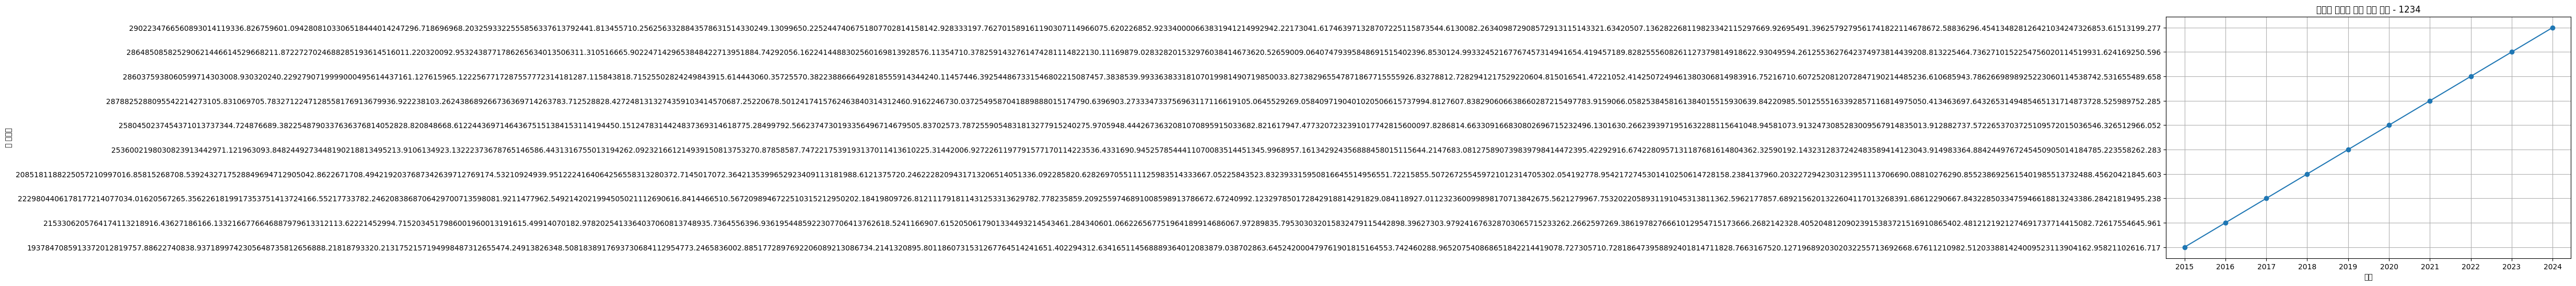

In [21]:
######################## 3-1
import requests
import pandas as pd
import matplotlib.pyplot as plt  # 🔹 추가: 그래프 시각화용

## 서울 열린데이터 API 기본 설정
API_KEY = "765965645a776c67313134774d587251"
BASE_URL = "http://openapi.seoul.go.kr:8088"
SERVICE = "energyUseDataSummaryInfo"

## 힌트 참조하여 2015/1-2024/12 데이터 수집
def get_year_months():
    year_months = []
    for year in range(2015, 2015 + 1):  # 테스트용으로 2015만 수집
        for month in range(1, 12 + 1):
            year_months.append(f'{year}{month:02d}')
    return year_months

responses = []

## 각 연월별로 API 호출하여 responses에 데이터 담기
for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]

    url = f"{BASE_URL}/{API_KEY}/json/{SERVICE}/1/1000/{year}/{month}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json().get(SERVICE, {}).get("row", [])
        personal_data = [row for row in data if "개인" in str(row)]
        for row in personal_data:
            row["year"] = int(year)
            row["month"] = int(month)
        responses.extend(personal_data)
        print(f"{year}-{month} api 호출 성공")
    else:
        print(f"{year}-{month} api 호출 실패")

## CSV 파일로 저장 및 전처리
if responses:
    df = pd.DataFrame(responses)

    ## 계절(season) 컬럼 추가
    def month_to_season(month):
        month = int(month)
        if month in [3, 4, 5]:
            return '봄'
        elif month in [6, 7, 8]:
            return '여름'
        elif month in [9, 10, 11]:
            return '가을'
        else:
            return '겨울'

    df['season'] = df['month'].apply(month_to_season)
    df.to_csv("personal_energy_use.csv", index=False, encoding="utf-8-sig")
    print(f"데이터 저장 완료(파일명 : personal_energy_use.csv)")

    ## 데이터 기본 정보 출력
    print("\n데이터 기본 정보 : ", df.index)

    ## 상위 10개 컬럼 값 출력
    for col in df.columns:
        print(f"{col} : {df[col].head(10).values.tolist()}")

    ## 연도별 에너지 총 사용량 계산
    ## 컬럼명은 실제 API 데이터 필드명에 따라 수정 필요
    energy_cols = ['EUS', 'GUS', 'WUS', 'HUS']  # 예시
    for col in energy_cols:
        if col not in df.columns:
            print(f"⚠️ 경고: '{col}' 컬럼이 없습니다.")

    ## 컬럼 존재하면 합계 계산
    existing_cols = [col for col in energy_cols if col in df.columns]
    if existing_cols:
        df['total_energy'] = df[existing_cols].sum(axis=1)

        ## 연도별 총 사용량 집계
        yearly_total = df.groupby('year')['total_energy'].sum().reset_index()

        ## 선 그래프 시각화
        plt.figure(figsize=(10,6))
        plt.plot(yearly_total['year'], yearly_total['total_energy'], marker='o')
        plt.title("연도별 에너지 사용 총액 변화 - 4167")  ## 학번 뒤 4자리=4167
        plt.xlabel("연도")
        plt.ylabel("총 사용량")
        plt.grid(True)
        plt.xticks(yearly_total['year'])
        plt.tight_layout()
        plt.savefig("yearly_total_energy_4167.png")
        plt.show()  ## 화면에 그래프 출력
    else:
        print("그래프 없음")

else:
    print("데이터 없음")
